In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics



In [2]:
colnames = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
           'concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se',
           'compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',
           'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']


In [3]:
cancer_data = pd.read_csv("wdbc.csv",names = colnames, header = None)
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Since ID cannot be used for classification we can drop the column
cancer_data.drop('id',axis=1,inplace=True)


In [5]:
len(cancer_data)

569

In [6]:
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1,'B':0})
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#Check for any null values in the dataset
cancer_data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave_points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave_points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_worst             False
fractal_di

In [8]:
cancer_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

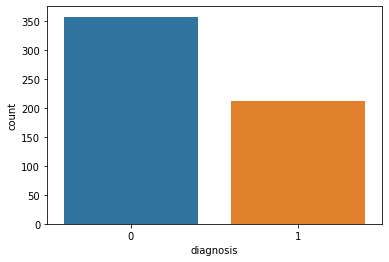

In [9]:
#We can count how many people have malignant and benign tumors . 
#Now lets also split the data into our features and labels, then map our labels to integers.
sbn.countplot(x = 'diagnosis', data = cancer_data)

In [10]:
cancer_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

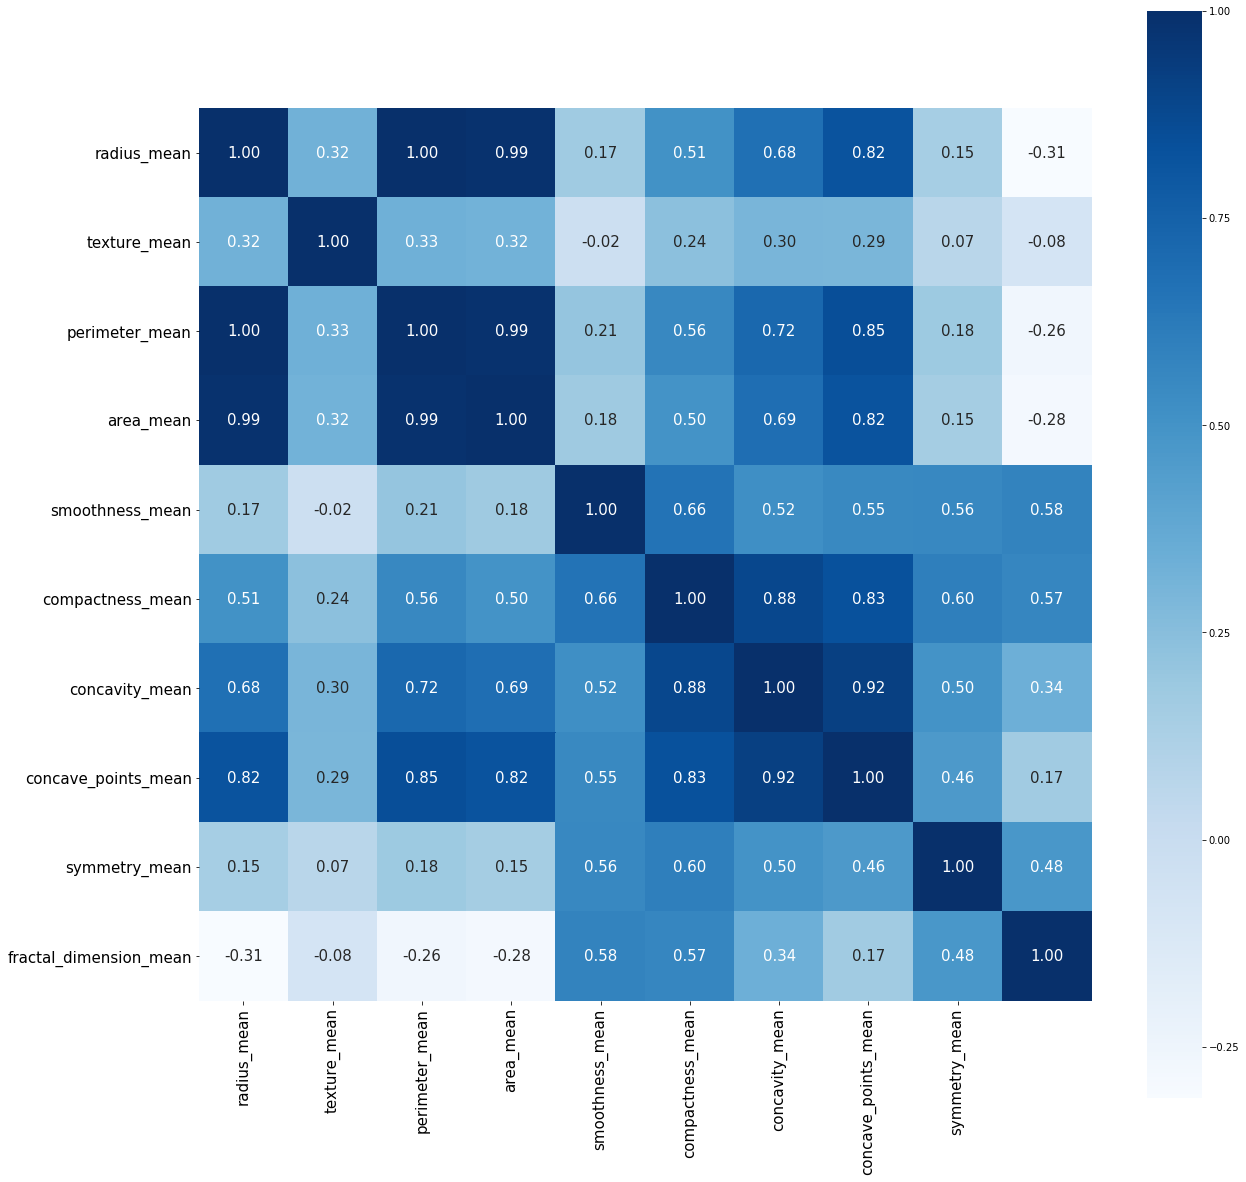

In [13]:
#From the feature names, we cann notice that there are three main categories 'value means', 'standard deviation' and 'worst'.
#Let us explore the correlation between sets of features
x = cancer_data.iloc[:, 1:]
features_mean = x.columns[:10]
features_se = x.columns[10:20]
features_worst = x.columns[20:]
corr = x[features_mean].corr()
g = sbn.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'Blues' )
g.set_xticklabels(rotation=90, labels = features_mean, size = 15)
g.set_yticklabels(rotation=0, labels = features_mean, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (20,20)

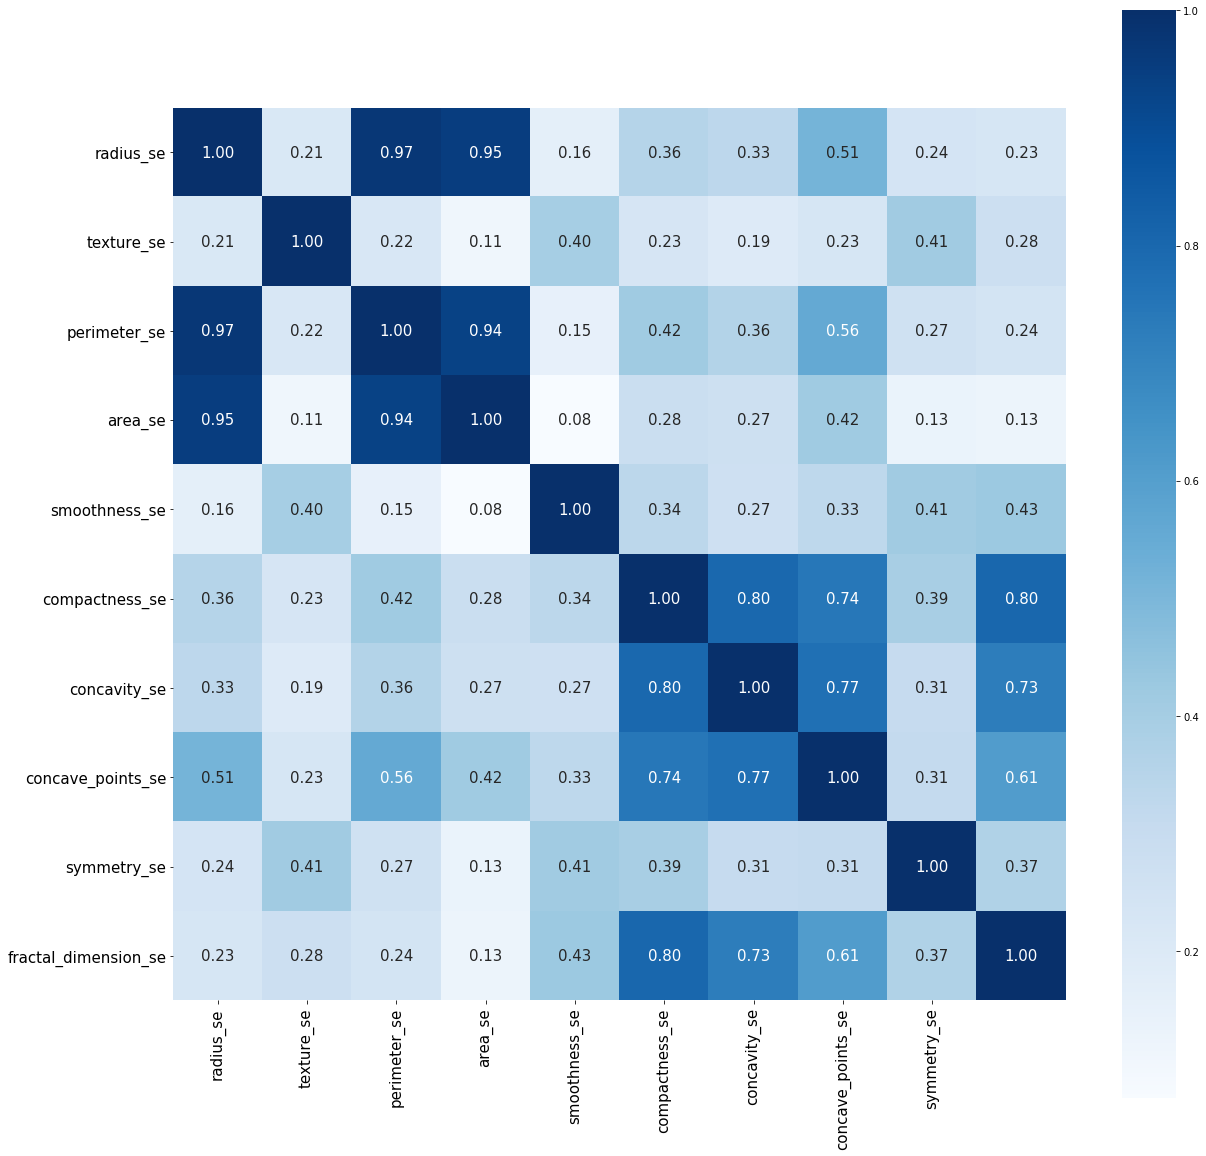

In [14]:
corr = x[features_se].corr()
g = sbn.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'Blues' )
g.set_xticklabels(rotation=90, labels = features_se, size = 15)
g.set_yticklabels(rotation=0, labels = features_se, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (20,20)

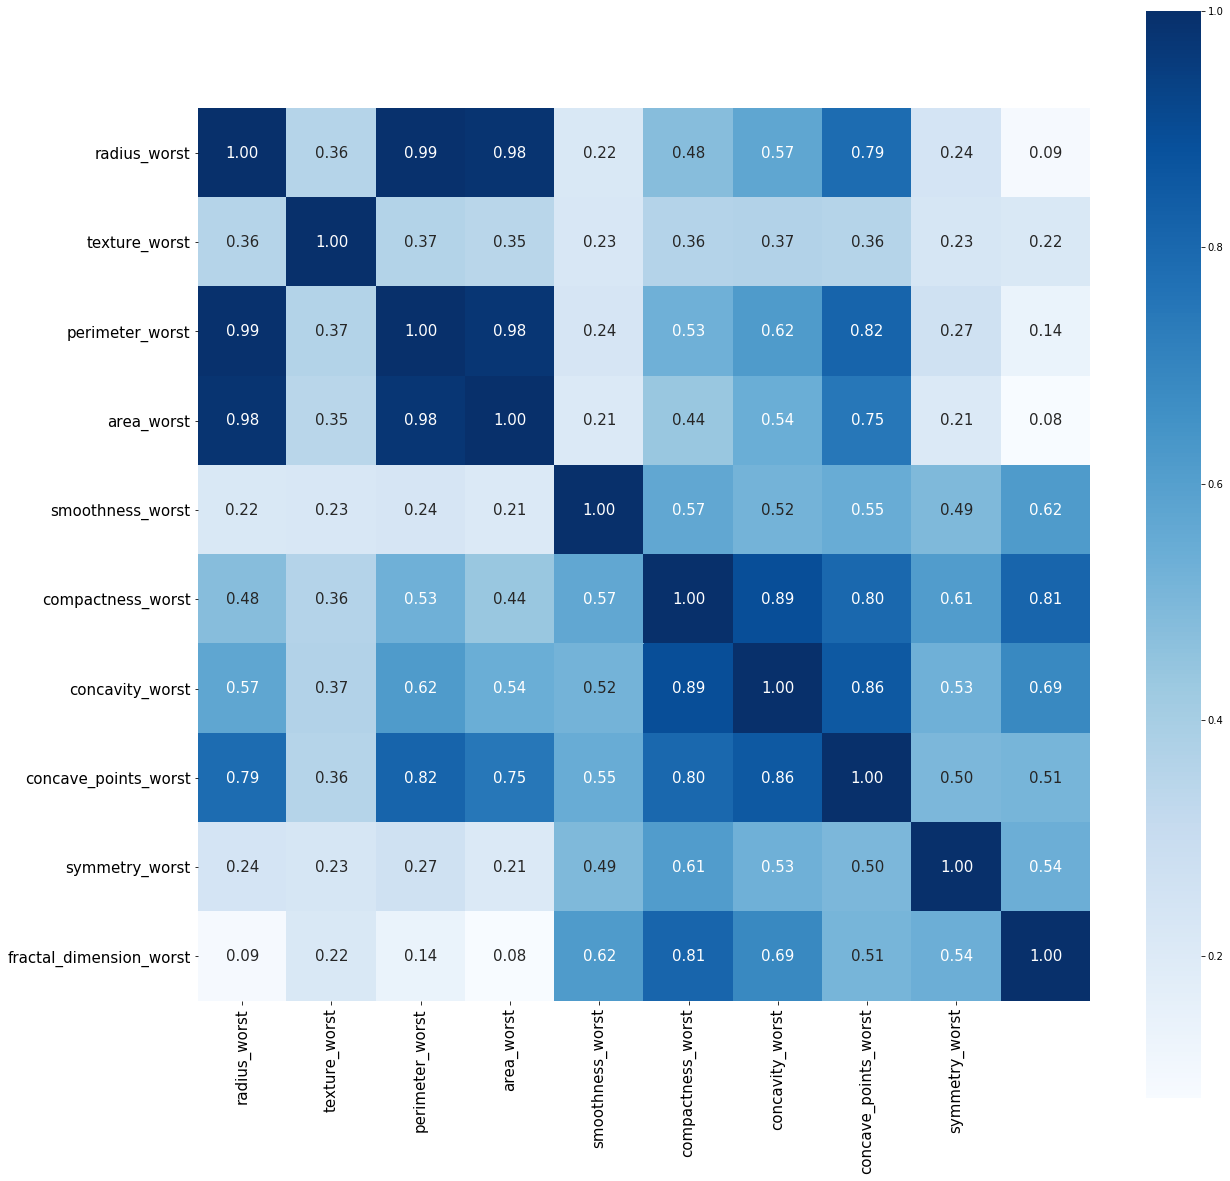

In [15]:
corr = x[features_worst].corr()
g = sbn.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'Blues' )
g.set_xticklabels(      rotation=90, labels = features_worst, size = 15)
g.set_yticklabels(rotation=0, labels = features_worst, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (20,20)

In [16]:
dfM=cancer_data[cancer_data['diagnosis'] ==1]
dfB=cancer_data[cancer_data['diagnosis'] ==0]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


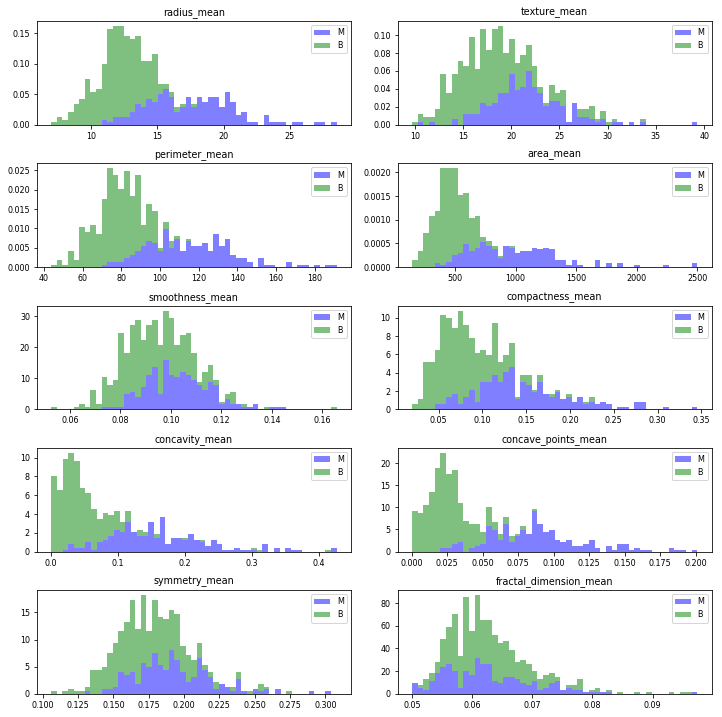

In [17]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancer_data[features_mean[i]]) - min(cancer_data[features_mean[i]]))/50
    ax.hist([dfM[features_mean[i]],dfB[features_mean[i]]], bins=np.arange(min(cancer_data[features_mean[i]]), max(cancer_data[features_mean[i]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[i])
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


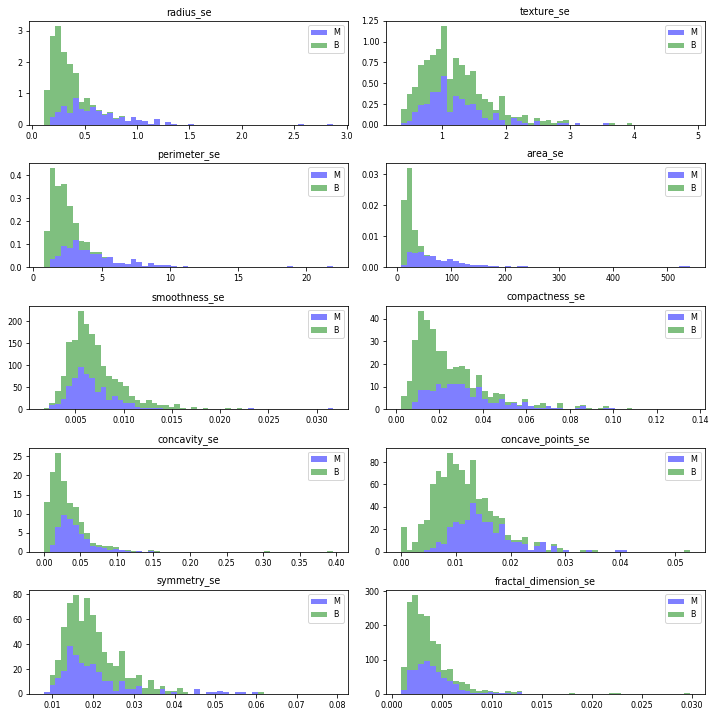

In [18]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancer_data[features_se[i]]) - min(cancer_data[features_se[i]]))/50
    ax.hist([dfM[features_se[i]],dfB[features_se[i]]], bins=np.arange(min(cancer_data[features_se[i]]), max(cancer_data[features_se[i]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_se[i])
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


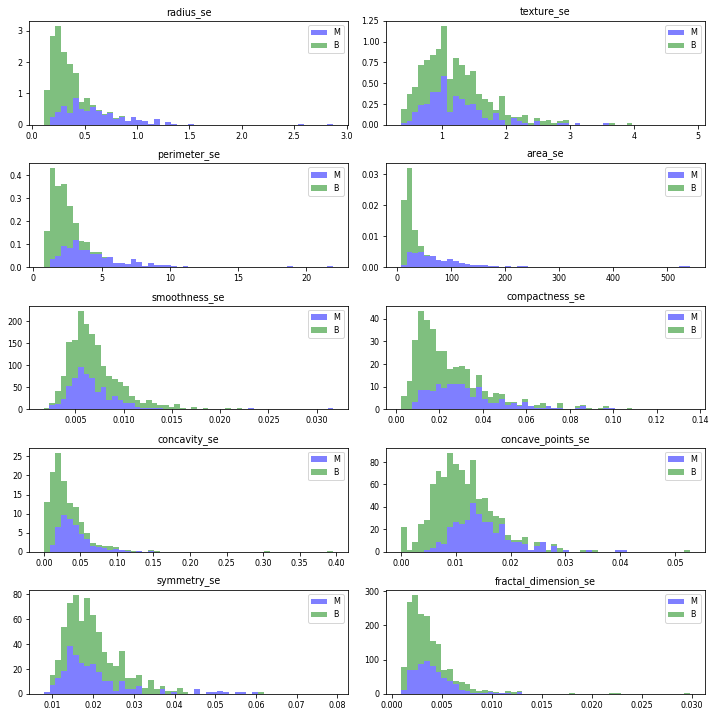

In [19]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancer_data[features_se[i]]) - min(cancer_data[features_se[i]]))/50
    ax.hist([dfM[features_se[i]],dfB[features_se[i]]], bins=np.arange(min(cancer_data[features_se[i]]), max(cancer_data[features_se[i]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_se[i])
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


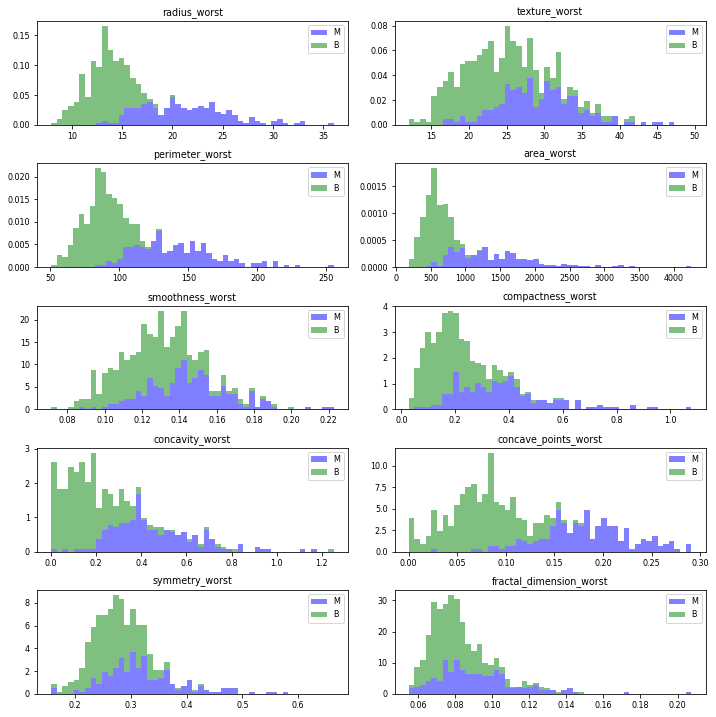

In [20]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancer_data[features_worst[i]]) - min(cancer_data[features_worst[i]]))/50
    ax.hist([dfM[features_worst[i]],dfB[features_worst[i]]], bins=np.arange(min(cancer_data[features_worst[i]]), max(cancer_data[features_worst[i]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_worst[i])
plt.tight_layout()
plt.show()

In [21]:
#Observations
#1.None of the histograms show any noticeable large outliers so there is no need for further cleaning of data
#2.Values of radius, perimeter, area, compactness, concavity and concave points can be potentially used for classification as the
#  larger values of these parameters shows a high correlation with malignant tumors.
#3.No noticeable trends can be observed from texture, smoothness, symmetry or fractual dimension
#4.We can use mean values for our classification

In [22]:
#Model building
#In this step we will divide the data into test and train data to create the data model.

In [23]:
f_data = cancer_data.iloc[:,1:11]
t_data = cancer_data.iloc[:,0:1]
X_train, X_test, y_train, y_test = train_test_split(f_data, t_data, test_size=0.4, random_state=0)

In [24]:
X_train.shape

(341, 10)

In [25]:
y_train.shape

(341, 1)

In [26]:
X_test.shape

(228, 10)

In [27]:
y_test.shape

(228, 1)

In [28]:
#Classification
#First we will use the decision tress classifier

In [29]:
#from sklearn import tree
#clf = tree.DecisionTreeClassifier()
 
dtc = DecisionTreeClassifier()
fit = dtc.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.92


In [49]:
clf = DecisionTreeClassifier()

In [50]:
y_pre = fit.predict(X_test) 
y_pre

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [51]:
y_pre.shape

(228,)

In [52]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[136   9]
 [  9  74]]


In [53]:
print (classification_report(y_test,y_pre))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94       145
          1       0.89      0.89      0.89        83

avg / total       0.92      0.92      0.92       228



In [54]:
kf = KFold(n_splits=5,random_state=4)
for train_index, test_index in kf.split(f_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_1, X_test_1 = f_data.iloc[train_index], f_data.iloc[test_index]
    y_train_1, y_test_1 = t_data.iloc[train_index], t_data.iloc[test_index]

TRAIN: [114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358

In [55]:
for k, (train_index, test_index) in enumerate(kf.split(f_data)): 
    X_train_1, X_test_1 = f_data.iloc[train_index], f_data.iloc[test_index] 
    y_train_1, y_test_1 = t_data.iloc[train_index], t_data.iloc[test_index] 
    clf.fit(X_train_1, y_train_1) 
    print ("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test_1, y_test_1)))

[fold 0] score: 0.91228
[fold 1] score: 0.88596
[fold 2] score: 0.94737
[fold 3] score: 0.92982
[fold 4] score: 0.92035


In [56]:
cancer_feature_names = list(f_data.columns)
cancer_target_names_object = cancer_data['diagnosis'].apply(lambda x: "M" if x == 1 else "B").unique()
cancer_target_names = list(cancer_target_names_object)

In [57]:
with open('c_data.dot', 'w') as f:
    f = tree.export_graphviz(fit, out_file=f, feature_names=cancer_feature_names, class_names=cancer_target_names, filled=True, rounded=True, special_characters=True)

In [58]:
clf_1 = DecisionTreeClassifier(criterion='entropy')

In [59]:
clf_1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
fit_1 = clf_1.fit(X_train, y_train)

In [61]:
y_pre_1 = fit_1.predict(X_test)   
y_pre_1
y_pre_1.shape

(228,)

In [62]:
cm_1 = confusion_matrix(y_test, y_pre_1)
print (cm)

[[136   9]
 [  9  74]]


In [63]:
print (classification_report(y_test,y_pre_1))

             precision    recall  f1-score   support

          0       0.94      0.92      0.93       145
          1       0.86      0.89      0.88        83

avg / total       0.91      0.91      0.91       228



In [64]:
for k, (train_index, test_index) in enumerate(kf.split(f_data)): 
    X_train_1, X_test_1 = f_data.iloc[train_index], f_data.iloc[test_index] 
    y_train_1, y_test_1 = t_data.iloc[train_index], t_data.iloc[test_index] 
    clf_1.fit(X_train_1, y_train_1) 
    print ("[fold {0}] score: {1:.5f}".format(k, clf_1.score(X_test_1, y_test_1)))

[fold 0] score: 0.88596
[fold 1] score: 0.90351
[fold 2] score: 0.95614
[fold 3] score: 0.95614
[fold 4] score: 0.94690


In [65]:
#AUC is a good way for evaluation for this type of problems.

In [66]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pre_1)

In [67]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.904403822185293

In [68]:
# From above setting criterion = "entropy' improved performance, recall improved from 0.83 to 0.90

In [69]:
#k nearest neighbours algorithm

In [70]:
X_train, X_test, y_train, y_test = train_test_split(f_data, t_data, test_size=0.4, random_state=0)

In [71]:
X_train.shape

(341, 10)

In [72]:
y_train.shape

(341, 1)

In [73]:
X_test.shape


(228, 10)

In [74]:
y_test.shape

(228, 1)

In [75]:
print ("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[Train/test split] score: 0.98246


In [76]:
for x in range(1,6):
    clf = KNeighborsClassifier(x)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    accuracy = metrics.accuracy_score(predicted,y_test)
    cm = confusion_matrix(y_test,predicted)
    print ("\nk = "+ str(x))
    print ("Confusion matrix:\n", cm)
    print (classification_report(y_test, predicted)+"\n")
    print("Accuracy for kNN : %s" % "{0:.3%}".format(accuracy))


k = 1
Confusion matrix:
 [[136   9]
 [ 18  65]]
             precision    recall  f1-score   support

          0       0.88      0.94      0.91       145
          1       0.88      0.78      0.83        83

avg / total       0.88      0.88      0.88       228


Accuracy for kNN : 88.158%

k = 2
Confusion matrix:
 [[142   3]
 [ 26  57]]
             precision    recall  f1-score   support

          0       0.85      0.98      0.91       145
          1       0.95      0.69      0.80        83

avg / total       0.88      0.87      0.87       228


Accuracy for kNN : 87.281%

k = 3
Confusion matrix:
 [[137   8]
 [ 17  66]]
             precision    recall  f1-score   support

          0       0.89      0.94      0.92       145
          1       0.89      0.80      0.84        83

avg / total       0.89      0.89      0.89       228


Accuracy for kNN : 89.035%

k = 4
Confusion matrix:
 [[142   3]
 [ 19  64]]
             precision    recall  f1-score   support

          0       0.8

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
#We notice that for k=4, the accuracy and the precision is highest. Let us check the results with cross fold validation
clf = KNeighborsClassifier(4)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
predicted.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


(228,)

In [94]:
for k, (train_index, test_index) in enumerate(kf.split(f_data)): 
    X_train_1, X_test_1 = f_data.iloc[train_index], f_data.iloc[test_index] 
    y_train_1, y_test_1 = t_data.iloc[train_index], t_data.iloc[test_index] 
    clf.fit(X_train, y_train) 
    print ("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test_1, y_test_1)))

[fold 0] score: 0.79825
[fold 1] score: 0.85965
[fold 2] score: 0.96491
[fold 3] score: 0.92982
[fold 4] score: 0.93805


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [79]:
#Naive Bayes Classifier

In [80]:
X_train, X_test, y_train, y_test = train_test_split(f_data, t_data, test_size=0.4, random_state=0)
clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
prediction.shape

(228,)

In [82]:
cm = confusion_matrix(y_test,prediction)
print (cm)

[[136   9]
 [ 13  70]]


In [83]:
print (classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.91      0.94      0.93       145
          1       0.89      0.84      0.86        83

avg / total       0.90      0.90      0.90       228



In [84]:
accuracy = metrics.accuracy_score(prediction,y_test)
print("Accuracy for Naive Bayes : %s" % "{0:.3%}".format(accuracy))

Accuracy for Naive Bayes : 90.351%


In [85]:
for k, (train_index, test_index) in enumerate(kf.split(f_data)): 
    X_train_1, X_test_1 = f_data.iloc[train_index], f_data.iloc[test_index] 
    y_train_1, y_test_1 = t_data.iloc[train_index], t_data.iloc[test_index] 
    clf.fit(X_train_1, y_train_1) 
    print ("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test_1, y_test_1)))

[fold 0] score: 0.82456
[fold 1] score: 0.90351
[fold 2] score: 0.95614
[fold 3] score: 0.92982
[fold 4] score: 0.92920


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
#Accuracy of KNN

In [87]:
accuracy = metrics.accuracy_score(predicted,y_test)
print("Accuracy for kNN : %s" % "{0:.3%}".format(accuracy))

Accuracy for kNN : 89.912%


In [88]:
#Accuracy of Decission Trees- Gini & Entropy

In [89]:
accuracy = metrics.accuracy_score(y_pre,y_test)
print("Accuracy for Decision Tree : %s" % "{0:.3%}".format(accuracy))

Accuracy for Decision Tree : 92.105%


In [90]:
accuracy = metrics.accuracy_score(y_pre_1,y_test)
print("Accuracy for Decision Tree : %s" % "{0:.3%}".format(accuracy))

Accuracy for Decision Tree : 90.789%


In [91]:
#Accuracy of Naive Bayes

In [92]:
accuracy = metrics.accuracy_score(prediction,y_test)
print("Accuracy for Naive Bayes : %s" % "{0:.3%}".format(accuracy))

Accuracy for Naive Bayes : 90.351%
